# Trabalho ENGA75

### Autor: Allan Souza Almeida

#### Importando objeto UR5 e suas funções

In [1]:
import ur5
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
PI = math.pi
ur5 = ur5.UR5()

Inicializando parâmetros do robô...
Obtendo handles das juntas...
Iniciando simulação...
Pronto!


## Etapa A1

Implementar a Cinemática Direta e Inversa do Robô UR5. Validar a modelagem com o auxílio do
simulador para um conjunto de valores das variáveis das juntas (Cinemática Direta) e para um conjunto de
posições e orientações da garra (Cinemática Inversa)

#### Cinemática Direta

<img src="Cinemática Direta (DH).png" width="500">

In [ ]:
def validate_fk(ang):
    fk = ur5.forward_kinematics(ang)    # Calcular cinemática direta a partir dos ângulos
    print('Cinemática Direta: ')
    print(fk)
    ur5.move_to_config(ang)     # Mover para a posição
    print('Ground Truth: ')
    gt = ur5.get_ground_truth()     # Obter Ground Truth
    print(gt)
    print('Erro: ', np.linalg.norm(fk-gt)/np.linalg.norm(gt)*100, '%')  # Calcular e printar erro

In [ ]:
validate_fk([.5*PI, .05*PI, .45*PI, 0, -.5*PI, .5*PI])

In [ ]:
validate_fk([-.5*PI, -.05*PI, -.45*PI, 0, .5*PI, .5*PI])

In [ ]:
validate_fk([PI/2, 0, 0, 0, 0, 0])

In [ ]:
validate_fk([.1*PI, .18*PI, .57*PI, 0.25*PI, 0.2, PI/2])

In [ ]:
validate_fk([-.3*PI, -.04*PI, -.8*PI, -0.17*PI, -0.5, PI/2])

In [ ]:
validate_fk([0.2, .04*PI, .8*PI, 0.17*PI, 0.3, PI/2])

#### Cinemática Inversa

<img src="gripper.png" width="700">

In [ ]:
ur5.move_to_pose([-0.1, -.55, .4], [PI, 0, PI/2], wrist='up')

In [ ]:
ur5.move_to_pose([-0.1, -.55, .4], [0, 0, -PI/2], wrist='down')

In [ ]:
ur5.move_to_pose([-0.1, -.55, .4], [PI/2, 0, -PI/2], wrist='down')

In [ ]:
ur5.move_to_pose([-0.1, -.45, .4], [PI/2, 0, -PI/2], wrist='down')

In [ ]:
ur5.move_to_pose([-0.1, -.45, .25], [PI/2, 0, -PI/2], wrist='down')

In [ ]:
ur5.move_to_pose([-0.1, -.45, .25], [0, -PI/2, PI], wrist='up')

## Etapa A2

Implementar um sistema de planejamento de trajetórias no espaço de juntas com uma das abordagens
abaixo:

1. Trajetórias polinomiais cúbicas ou de quinto grau;
2. Linear Segments with Parabolic Blends (LSPB);
3. Minimum Time Trajectories

<b>Polinômio de Quinto Grau</b>

<p>$q(t) = a_0+a_1 t + a_2 t^2 + a_3 t^3 + a_4 t^4 + a_5 t^5$</p>

<p>$\dot{q}(t) = a_1 + 2 a_2 t + 3 a_3 t^2 + 4 a_4 t^3 + 5 a_5 t^4$</p>

<p>$\ddot{q}(t) = 2 a_2 + 6 a_3 t + 12 a_4 t^2 + 20 a_5 t^3$</p>

$\begin{bmatrix}
1 & t_0 & t_0^2 & t_0^3 & t_0^4 & t_0^5\\
0 & 1 & 2t_0 & 3t_0^2 & 4t_0^3 & 5t_0^4\\
0 & 0 & 2 & 6t_0 & 12t_0^2 & 20t_0^3\\
1 & t_f & t_f^2 & t_f^3 & t_f^4 & t_f^5\\
0 & 1 & 2t_f & 3t_f^2 & 4t_f^3 & 5t_f^4\\
0 & 0 & 2 & 6t_f & 12t_f^2 & 20t_f^3\\
\end{bmatrix}

\cdot

\begin{bmatrix}
a_0\\
a_1\\
a_2\\
a_3\\
a_4\\
a_5\\
\end{bmatrix}

=

\begin{bmatrix}
q_0\\
\dot{q}_0\\
\ddot{q}_0\\
q_f\\
\dot{q}_f\\
\ddot{q}_f\\
\end{bmatrix}$

<p>$A\cdot X = B$</p>

In [ ]:
t, max_err, mean_err, graphs = ur5.move_to_config([.5*PI, .05*PI, .45*PI, 0, -.5*PI, .3*PI], graph=True)

In [ ]:
titles = ['Posição', 'Velocidade', 'Aceleração', 'Solavanco']
axes = ['rad', 'rad/s', 'rad/$s^2$', 'rad/$s^3$']

for i in range(4):
    for j in range(6):
        plt.plot(graphs[4][j], graphs[i][j])
    plt.legend(['q1', 'q2', 'q3', 'q4', 'q5', 'q6'])
    plt.grid()
    plt.title(titles[i], fontsize=18)
    plt.ylabel(axes[i], rotation=0, labelpad=20)
    plt.xlabel('t [s]')
    plt.show()

## Visão Computacional

In [2]:
from ur5 import ComputerVision
import time
cv = ComputerVision()

In [101]:
ur5.move_to_pose([-0.1, -.55, .4], [PI, 0, PI/2], wrist='up')

Iterações totais:  7
Erro pose final:  0.07092941306690415 %


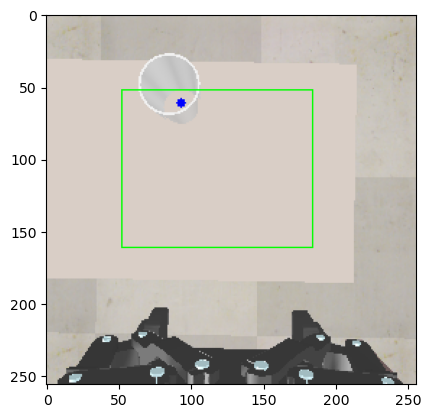

In [102]:
cup_position = cv.move_cup()

In [103]:
# Pre graspping
ur5.move_to_pose(cup_position+np.array([0, 0.2, 0.015]), [PI/2, 0, -PI/2])

Iterações totais:  36
Erro pose final:  0.16129256729990157 %


In [104]:
ur5.move_to_pose(cup_position + np.array([0, 0.02, 0.017]), [PI / 2, 0, -PI / 2], duration=6)

Iterações totais:  30
Erro pose final:  0.19281077711356978 %


In [105]:
ur5.close_gripper()

In [106]:
ur5.move_to_pose(np.array([0.4, 0, cup_position[2]+0.1]), [PI/2, 0, -PI/2], wrist='up', duration=10)

Iterações totais:  50
Erro pose final:  0.0889608452529429 %


In [107]:
ur5.move_to_pose(np.array([0.4, 0, cup_position[2]+0.008]), [PI/2, 0, -PI/2], wrist='up')

Iterações totais:  7
Erro pose final:  0.09987625469587062 %


In [108]:
ur5.open_gripper()
time.sleep(1)

if


In [109]:
ur5.move_to_pose(np.array([0.4, .1, cup_position[2]+0.01]), [PI/2, 0, -PI/2], wrist='up')

Iterações totais:  7
Erro pose final:  0.07365960722705263 %


In [110]:
ur5.move_to_pose(np.array([0.4, .1, cup_position[2]+0.2]), [PI/2, 0, -PI/2], wrist='up')

Iterações totais:  7
Erro pose final:  0.22627705748691868 %


In [111]:
ur5.move_to_pose([-0.1, -.55, .4], [PI, 0, PI/2], wrist='up')

Iterações totais:  30
Erro pose final:  0.07982070938571788 %
